In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import gaussian_kde
from scipy.stats import linregress

In [3]:
min_n_slices = 2
max_GFP_med = 10**2.5
min_GFP_tot = 100
min_frac_in_cell = 0.99

cmap = matplotlib.cm.get_cmap('tab10')

coefs = pd.read_csv('20230914_csvs/GFP_coefs.csv',names=[1,2]).values[0,:]
coefs

/var/folders/1r/_dnhk2ss6m3fr8s3lgl4kcmw0000gn/T/ipykernel_84334/507077744.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


array([  20.975, 1701.6  ])

In [5]:
all_data = []
for i,r in enumerate(['1-3','1-6','1-12','1-24','1-48','1-96','1-192','0']):
    for t in ['5','10']:
            
        all_data.append(pd.read_csv(f'20230914_csvs/r{r}_{t}min.csv'))
all_data = pd.concat(all_data,axis=0)
print(len(all_data),len(all_data.columns))

196668 34


/var/folders/1r/_dnhk2ss6m3fr8s3lgl4kcmw0000gn/T/ipykernel_84334/3213860871.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,7e5])


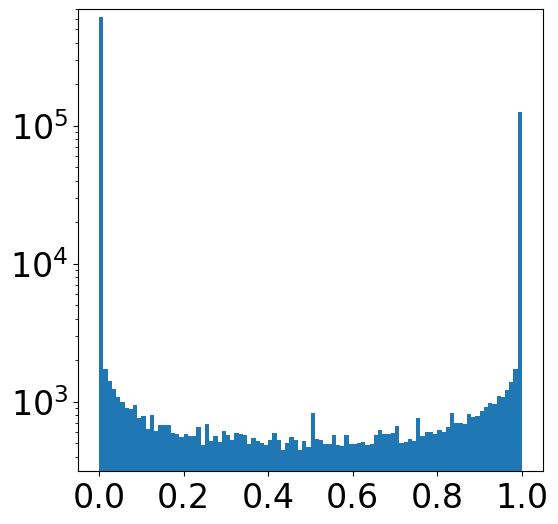

In [7]:
plt.figure(figsize=[6,6])

hist_data,bins = np.histogram(all_data['frac_in_cell'], bins=np.linspace(0,1,101),density=False)
hist_data[0] = 615195 #number not touchinng cell calculated in MATLAB on Tinytim
# D:\wlwhite\image_processing\20230914_array_density_range_5-10min_fresh_arrays\get_num_not_touching_cell.m

plt.bar(bins[:-1],hist_data,width=bins[1],align='edge')
plt.yscale('log')

# plt.plot([min_frac_in_cell]*2,[0,4e5],'k--',linewidth=3)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim([0,7e5])

plt.savefig(f'in_cell.png',dpi=1000,bbox_inches='tight')

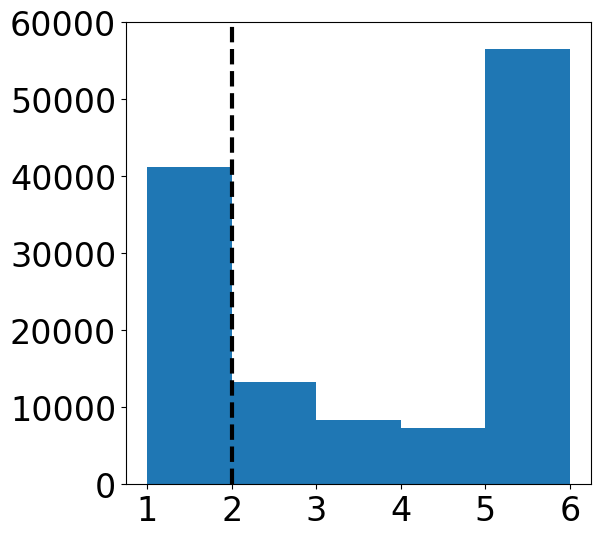

In [9]:
plt.figure(figsize=[6,6])

filtered = all_data[(all_data['frac_in_cell'] > min_frac_in_cell)]

plt.hist(filtered['n_slices'],bins=range(1,7),density=False)

plt.plot([min_n_slices]*2,[0,6e4],'k--',linewidth=3)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.ylim([0,6e4])

plt.savefig(f'n_slices.png',dpi=1000,bbox_inches='tight')

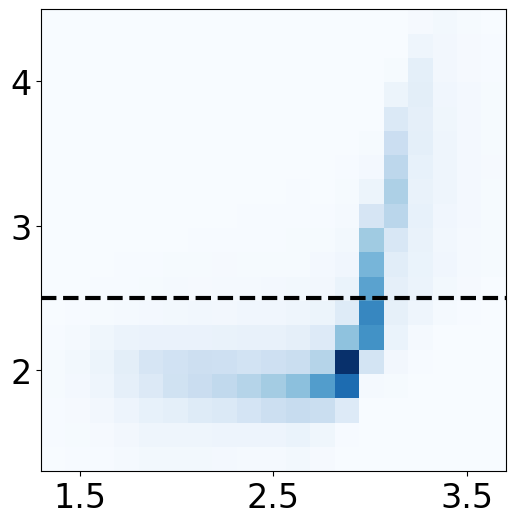

In [11]:
filtered = all_data[(all_data['GFP_med']>0) & \
                    (all_data['frac_in_cell'] > min_frac_in_cell) &\
                    (all_data['n_slices']>=min_n_slices)]

plt.figure(figsize=[6,6])
plt.hist2d(np.log10(filtered['volume']),np.log10(filtered['GFP_med']),
           bins=[np.linspace(1.3,3.7,20),np.linspace(1.3,4.5,20)],cmap='Blues')

plt.plot([1.3,4],[np.log10(max_GFP_med)]*2,'k--',linewidth=3)

plt.xticks([1.5,2.5,3.5],fontsize=24)
plt.yticks([2,3,4],fontsize=24)

plt.savefig(f'med_vs_vol_2D_hist.png',dpi=1000,bbox_inches='tight')

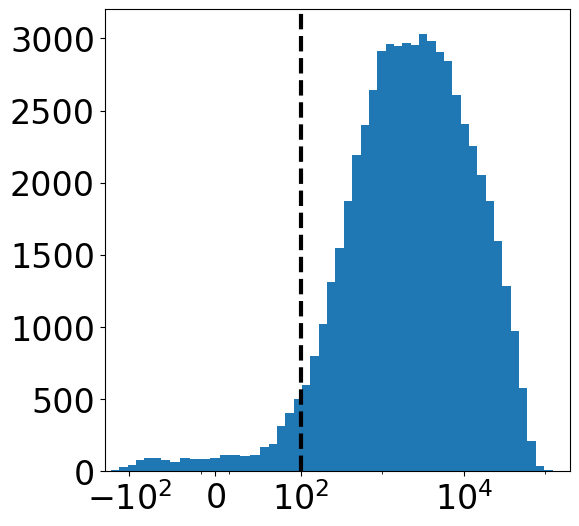

In [17]:
plt.figure(figsize=[6,6])

all_data['N_GFP'] = (all_data['GFP_tot'] - coefs[1])/coefs[0]

filtered = all_data[(all_data['GFP_med'] < max_GFP_med) & \
                    (all_data['frac_in_cell'] > min_frac_in_cell) &\
                    (all_data['n_slices'] >= min_n_slices)]

linthresh = 1.5
bins = np.concatenate([-np.logspace(4,linthresh,int(10*(4-linthresh)))[:-1],
                       np.linspace(-10**linthresh,10**linthresh,10)[:-1],
                       np.logspace(linthresh,5.5,int(10*(5.5-linthresh)))],axis=0)

plt.hist(filtered['N_GFP'], bins=bins, density=False)
plt.xscale('symlog',linthresh=10**linthresh,linscale=0.5)

plt.plot([min_GFP_tot]*2,[0,5000],'k--',linewidth=3)

plt.xticks([-1e2,0,1e2,1e4],fontsize=24)
plt.yticks(fontsize=24)

plt.xlim([-2e2,2e5])
plt.ylim([0,3200])

plt.savefig(f'GFP_tot.png',dpi=1000,bbox_inches='tight')

In [19]:
bins

array([-1.00000000e+04, -7.86743808e+03, -6.18965819e+03, -4.86967525e+03,
       -3.83118685e+03, -3.01416253e+03, -2.37137371e+03, -1.86566358e+03,
       -1.46779927e+03, -1.15478198e+03, -9.08517576e+02, -7.14770577e+02,
       -5.62341325e+02, -4.42418555e+02, -3.48070059e+02, -2.73841963e+02,
       -2.15443469e+02, -1.69498815e+02, -1.33352143e+02, -1.04913973e+02,
       -8.25404185e+01, -6.49381632e+01, -5.10896977e+01, -4.01945033e+01,
       -3.16227766e+01, -2.45954929e+01, -1.75682092e+01, -1.05409255e+01,
       -3.51364184e+00,  3.51364184e+00,  1.05409255e+01,  1.75682092e+01,
        2.45954929e+01,  3.16227766e+01,  4.00464573e+01,  5.07140396e+01,
        6.42232542e+01,  8.13310558e+01,  1.02996037e+02,  1.30432139e+02,
        1.65176674e+02,  2.09176466e+02,  2.64896929e+02,  3.35460219e+02,
        4.24820170e+02,  5.37983840e+02,  6.81292069e+02,  8.62774769e+02,
        1.09260086e+03,  1.38364807e+03,  1.75222448e+03,  2.21898234e+03,
        2.81007524e+03,  